(100, 2)
(100, 2)


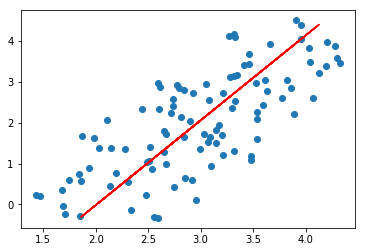

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pca(data, topN=5):
    data_mean = data - np.mean(data, axis=0)
    data_cov = np.cov(data_mean,rowvar=0)
#     data_cov = data_mean.T.dot(data_mean)/(N-1)
    data_vals, data_vects = np.linalg.eig(data_cov)
    data_index = np.argsort(data_vals)[:-(topN + 1):-1]
    data_vects = data_vects[:, data_index]
    data_recon = data_mean.dot(data_vects).dot(data_vects.T) + np.mean(data, axis=0)
    return data_recon

N = 100
dataX = np.linspace(2, 4, N)
dataY = dataX * 2 - 4
dataX = dataX + (np.random.rand(N)-0.5)*1.5
dataY = dataY + (np.random.rand(N)-0.5)*1.5
data = np.array([dataX,dataY])
a = pca(data.T, 1)
print(data.T.shape)
print(a.shape)
plt.plot(dataX, dataY, 'o')
plt.plot(a[:,0],a[:,1], 'r')
plt.show()

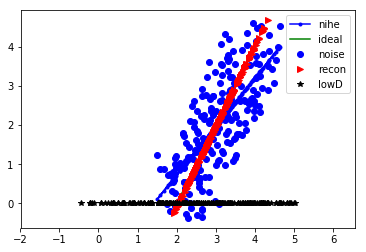

In [39]:
#!/usr/bin/env python
# coding: utf-8
#copyRight by heibanke

import numpy as np
import matplotlib.pyplot as plt

def pca(dataMat, topNfeat=5):  
    meanVals = np.mean(dataMat, axis=0)  
    meanRemoved = dataMat - meanVals                     #减去均值  
    covMat = np.cov(meanRemoved, rowvar=0)               #求协方差方阵  
    eigVals, eigVects = np.linalg.eig(covMat)            #求特征值和特征向量  
    eigValInd = np.argsort(eigVals)[:-(topNfeat + 1):-1] #对特征值进行排序  
    redEigVects = eigVects[:, eigValInd]                 #除去不需要的特征向量  
    lowDDataMat = meanRemoved.dot(redEigVects)           #求新的数据矩阵  
    reconMat = (lowDDataMat.dot(redEigVects.T)) + meanVals
    reduceData = lowDDataMat + np.mean(dataMat)

    return reduceData,reconMat
    
def optimal(A,b):
    B = A.T.dot(b)
    AA = np.linalg.inv(A.T.dot(A))#求A.T.dot(A)的逆
    P=AA.dot(B)
    return A.dot(P)    
    
N=200
x=np.linspace(2,4,N)
y=x*2-4

x1=x+(np.random.rand(N)-0.5)*1.5
y1=y+(np.random.rand(N)-0.5)*1.5

data = np.array([x1,y1])
a,b=pca(data.T,1)

one=np.ones((len(x1),1))#len(x)得到数据量
xx=x1.reshape((len(x1),1))
A=np.hstack((xx, one))#两个100x1列向量合并成100x2,(100, 1) (100,1 ) (100, 2)
yy=optimal(A,y1)
plt.plot(xx,yy,color='b',linestyle='-',marker='.',label=u"nihe")

plt.plot(x,y,color='g',linestyle='-',marker='',label='ideal') 
plt.plot(x1,y1,color='b',linestyle='',marker='o',label='noise')
plt.plot(b[:,0],b[:,1],color='r',linestyle='',marker='>',label='recon')
plt.plot(a[:,0],np.zeros(N),color='k',linestyle='',marker='*',label='lowD')

plt.legend()
plt.axis('equal')

plt.show()

In [38]:
%matplotlib inline

In [5]:
import numpy as np

A=np.array([[3,1],[2,4]])
eigVals, eigVects = np.linalg.eig(A)
print(A)
print(eigVals)
print(eigVects)
u,s,v = np.linalg.svd(A)
print(u)
print(s)
print(v)

[[3 1]
 [2 4]]
[ 2.  5.]
[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
[ 5.11667274  1.95439508]
[[-0.64074744 -0.76775173]
 [-0.76775173  0.64074744]]
